In [19]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 1. Newton’s method for computing least squares
In this problem, we will prove that if we use Newton’s method solve the least squares
optimization problem, then we only need one iteration to converge to $θ^∗$.

(a) Find the Hessian of the cost function $J(θ) = \frac{1}{2}\sum_{i=1}^{m}(θ^T x^{(i)} − y^{(i)})^2$.

(b) Show that the first iteration of Newton’s method gives us $θ^⋆ = (X^T X)^{−1}X^Ty^{hat}$, the
solution to our least squares problem.

Hessian matrix is the second partial derivatives, f(x1, x2, ... xn), H is a nxn matrix.
$H_{ij}= \frac{\partial ^2f}{\partial x_i\partial x_j}$ 

The cost function is $J(θ) = \frac{1}{2}\sum_{i=1}^{m}(θ^T x^{(i)} − y^{(i)})^2. θ ∈ R^n$ or n+1 dimensional vector if including intercept term $θ_0$.



### Some basics about matrix index notation
suppose we have two matrices: $A=(A_{ij}) ∈ R^{nxm}$ and $B=(B_{ij}) ∈ R^{mxn}$. The matrix product $C=AB=(C_{ij})=\sum_{k=1}^mA_{ik}B_{kj} ∈ R^{nxn}$. If we omit the summation and note repeated indices are to be summed, this can simply be written as  $C_{ij} = A_{ik}B_{kj}$.

reference is here: https://pdfs.semanticscholar.org/7349/540ff102e701d4b171edbe510c0763ea60b3.pdf



### (a) Find the Hessian of the cost function $J(θ) = \frac{1}{2}\sum_{i=1}^{m}(θ^T x^{(i)} − y^{(i)})^2$.

let's find the second derivatives of J(θ) with respect to θ, which is the H. In this case, $H ∈ R^{nxn}$
$J(θ) = \frac{1}{2}\sum_{i=1}^{m}(θ^T x^{(i)} − y^{(i)})^2$

$g(θ) = \frac{\partial J(θ)}{\partial θ_i}=\sum_{k=1}^{m}(θ^Tx^{(k)} - y^{(k)})x_i^{(k)}$

$H_{ij} = \frac{\partial ^2J(θ)}{\partial θ_i\partial θ_j}=\frac{\partial g(θ)}{\partial θ_j}=\sum_{k=1}^m(x_i^{(k)}x_j^{(k)})$


let $X ∈ R^{mxn}$ be the input matrix with m training examples and n features (living area, number of bedrooms, whatever)

Using index notation, X can be written as $x_{ij}$ and $X^T$ can be written as $x_{ji}$


$(X^TX)_{ij} = \sum_{k=1}^{m}(X^T)_{ik}X_{kj}= \sum_{k=1}^{m}X_{ki}X_{kj}=\sum_{k=1}^m(x_i^{(k)}x_j^{(k)})=H_{ij}$

Therefore, we have proved that: the Hessian of J(θ) is $H = X^TX$

### (b) Show that the first iteration of Newton’s method gives us $θ^⋆ = (X^T X)^{−1}X^Ty$  the solution to our least squares problem.

#### below is linear algebra proof. here we omitted a hundered steps .... wish i know more 
according to the lecture notes 1:

cost function's gradient is: $∇_θJ(θ) = X^TXθ − X^Ty$

Newton's update rules: $ θ = θ - H^{-1}\nabla_θJ(θ)$

the Hessian of J(θ) is $H = X^TX$

put them all together, the first update look like this:

\begin{align} \label{eq1}
\begin{split}
θ^{(1)} & = θ^{(0)} - H^{-1}\nabla_θJ(θ^{(0)})\\
 & = θ^{(0)} -(X^TX)^{-1}(X^TXθ^{(0)} − X^Ty\\
 & = θ^{(0)} - θ^{(0)} + (X^TX)^{-1}X^Ty\\
 & = (X^TX)^{-1}X^Ty
\end{split}
\end{align}

If you recall, this is exactly the normal equation, which finds the θ minizing the cost function J(θ). Therefore, this proves that whatever you initialize θ, Newton's method can always find the θ which minimizes J(θ) after one iteration. 

#### formating math equations:
https://www.overleaf.com/learn/latex/Aligning_equations_with_amsmath#%2FAligning_several_equations

### include an example to compare bach gradient descent and Newton's method to see if they converge to the same  $θ^⋆$

this example is from Andrew Ng's courera machine learning course: linear regression

In [20]:
data = np.loadtxt(os.path.join('data', 'ex1data1.txt'), delimiter=',')
X, y = data[:, 0], data[:, 1]
m = y.size  
X[:3]
y[:3]
m
X.shape
y.shape

array([6.1101, 5.5277, 8.5186])

array([17.592 ,  9.1302, 13.662 ])

97

(97,)

(97,)

Text(0,0.5,'Profit in $10,000')

Text(0.5,0,'Population of City in 10,000s')

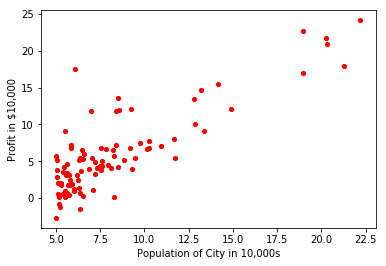

In [21]:
fig = plt.figure()  
plt.scatter(X, y, marker='.', s=68, c='red')
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.savefig('data_visalization.png', bbox_inches='tight',dpi=300)

In [22]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
X = np.stack([np.ones(m), X], axis=1)

In [23]:
def computeCost(X, y, theta):      
    # number of training examples
    m = y.size  
    J = 0
    J = (np.sum((X @ theta - y)**2))/2/m
    return J

In [24]:
def gradientDescent(X, y, theta, alpha, num_iters):   
    m = y.shape[0]  # number of training examples
    theta = theta.copy()
    J_history = [] 
    theta_history = []
    for i in range(num_iters):        
        # must update thetas simultaneously
        theta_tmp = []    
        for j in range(len(theta)): # partial derivative 
            gradient = (alpha/m) * np.sum(((X @ theta) - y) * X[:,j])
            new_theta = theta[j] - gradient
            theta_tmp.append(new_theta)        
        theta = theta_tmp
        theta_history.append(theta_tmp)
        J_history.append(computeCost(X, y, theta))
    # add in the intial theta and cost
    theta_history = [init_theta.tolist()] + theta_history
    J_history = [computeCost(X, y, init_theta)] + J_history
    return theta, J_history, theta_history

In [25]:
def gradient_descent_vectorized(X, y, theta, alpha, num_iters):   
    m = y.shape[0]  # number of training examples
    theta = theta.copy()
    for i in range(num_iters):    
        # vectorized implementation
        gradients = (alpha/m) * ((X @ theta) - y) @ X
        theta -= gradients  
    return theta

### Perform gradient descent to learn Theta by minimizing the cost function: $J(\theta)$

In [26]:
# initialize fitting parameters
# theta = np.zeros(2)
# theta = np.ones(2)
init_theta = np.array([5, 4])
# some gradient descent settings
iterations = 3000
alpha = 0.01

theta, J_history, theta_history = gradientDescent(X ,y, init_theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')
theta_history[:3]

Theta found by gradient descent: -3.8577, 1.1892
Expected theta values (approximately): [-3.6303, 1.1664]


[[5, 4],
 [4.681999350515464, 0.9891407845730922],
 [4.612858797786178, 0.4551879003217243]]

$θ^⋆ = (X^T X)^{−1}X^Ty$

You can see Newton's method arrive at the correct theta in one iteration and this is independant to initial θ. $θ^⋆$ is actually the same as the resolution of normal equation.

In [27]:
theta_star = (np.linalg.inv(X.T@X)@X.T)@y
theta_star

array([-3.89578088,  1.19303364])